In [1]:
import numpy as np
import pandas as pd
from scipy.special import expit as sigmoid  # sigmoid function
import matplotlib.pyplot as plt

np.random.seed(17373522)

In [2]:
def plot_distribution(data, bins=30, color='blue', title='Distribution of Data', xlabel='Values', ylabel='Frequency'):
    """
    Function to plot the distribution of a numpy array using a histogram.

    Parameters:
    - data: numpy array, the data to plot.
    - bins: int, number of bins for the histogram.
    - color: str, color of the histogram.
    - title: str, title of the plot.
    - xlabel: str, label for the x-axis.
    - ylabel: str, label for the y-axis.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, density=True, alpha=0.6, color=color, label='Histogram')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

    
def old_new_plt(data1, data2):
    data = np.concatenate((data1, data2))
    plot_distribution(data)

In [3]:
mu1, sigma1 = 50, 15  # Mean and standard deviation for x1
mu2, sigma2 = 50, 17  # Mean and standard deviation for x2
sigma3 = 0.5  # Parameters for x3

k1 = 0.0003
k2 = 0.0013
b1 = 10
b2 = 10


# Number of samples
n_samples = 400000

train_num = 10000

test_num = 2000

save_path = '/home/zimuwang/CFE_wash_data/simulation/result/240815data/'


In [4]:
def gen_x3(x1_local, x2_local):
#     return 10*((x1_local+x2_local)**2/180**2) + 10 + np.random.normal(0,sigma3,n_samples)
    return (x1_local+x2_local)**2 * 0.0003 + 10 + np.random.normal(0,sigma3,n_samples)

def gen_part1_p_y(x1_local, x2_local, x3_local):
#     return sigmoid( 10.5*((x1_local*x2_local)/8100) + 10 - x3_local )
    return sigmoid( (x1_local*x2_local) *  0.0013 + 10 - x3_local )

def gen_part2_p_y(x4_local, x5_local, x6_local):
#     return sigmoid( 10.5*((x1_local*x2_local)/8100) + 10 - x3_local )
    return sigmoid(-x4_local + x5_local + x6_local)

In [5]:
id_x0 = np.arange(0, n_samples)
id_x0_new = np.copy(id_x0)
id_x0

array([     0,      1,      2, ..., 399997, 399998, 399999])

In [6]:
x1= np.random.normal(mu1, sigma1, n_samples)
x2= np.random.normal(mu2, sigma2, n_samples)
x3= gen_x3(x1, x2)
part1_p_y= gen_part1_p_y(x1, x2, x3)
np.mean(part1_p_y)

0.5226069683492953

In [7]:
delta1_mu, delta1_sigma = 0, 15 / 2
delta2_mu, delta2_sigma = 0, 15 / 2

delta_1 = np.random.normal(delta1_mu, delta1_sigma, n_samples)
delta_2 = np.random.normal(delta2_mu, delta2_sigma, n_samples)

x1_new = x1 + delta_1
x2_new = x2 + delta_2

x3_new = gen_x3(x1_new, x2_new)

part1_p_y_new= gen_part1_p_y(x1_new, x2_new, x3_new)
np.mean(part1_p_y_new)

0.5152856025913105

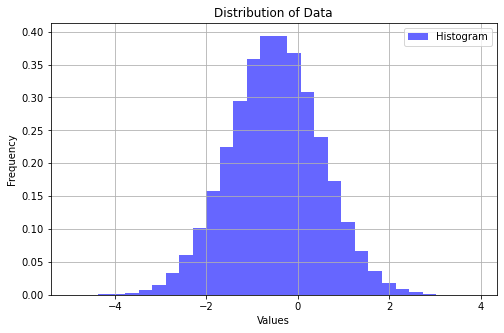

array([-2.06959537, -1.27601683,  0.74363553, ..., -0.3719008 ,
       -0.31723575, -0.61806275])

In [8]:
mu4, sigma4 = -0.5, 1.

x4= np.random.normal(mu4, sigma4, n_samples)

plot_distribution(x4)

x4

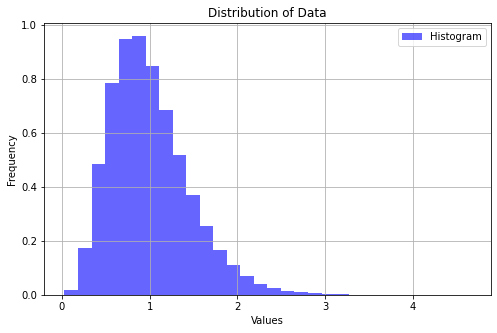

0.999977196388749

In [9]:
shape4 = 5.0  # 形状参数 α
scale4 = 1.0  # 尺度参数 β
delta4_k = 0.2

delta4 = np.random.gamma(shape4, scale4, n_samples) * delta4_k

plot_distribution(delta4)

np.mean(delta4)

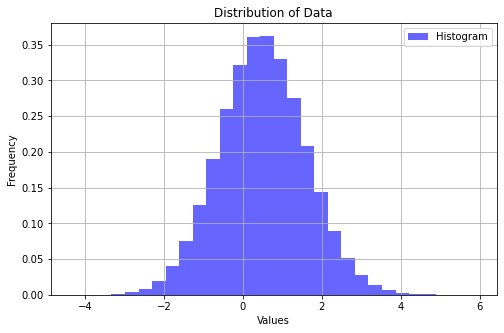

array([-1.26071903,  0.17281666,  1.27954431, ...,  0.37768784,
        0.82405362,  0.70705161])

In [10]:
x4_new = x4 + delta4

plot_distribution(x4_new)

x4_new

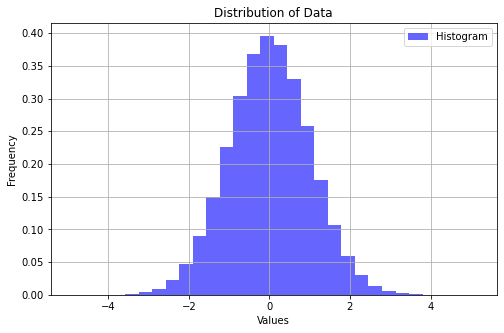

array([-1.09076575, -0.18988504,  0.79220299, ..., -0.90266847,
        0.14963716,  1.79236603])

In [11]:
mu5, sigma5 = 0, 1.

x5= np.random.normal(mu5, sigma5, n_samples)

plot_distribution(x5)

x5

In [12]:
x5_new = np.copy(x5)

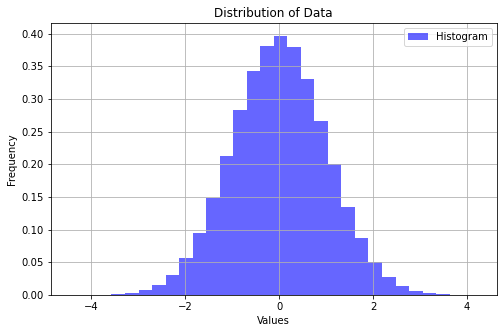

array([-1.2101516 , -0.450437  , -0.35377591, ..., -0.52042493,
       -1.33053449,  0.4262526 ])

In [13]:
mu6, sigma6 = 0, 1.

x6= np.random.normal(mu6, sigma6, n_samples)

plot_distribution(x6)

x6

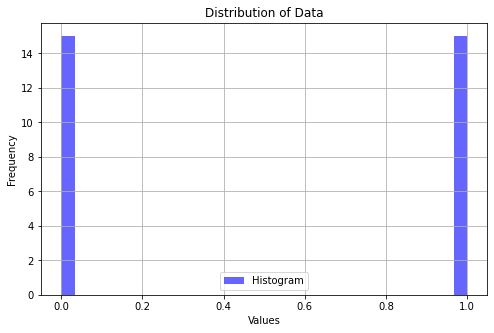

array([0, 1, 0, ..., 0, 1, 0])

In [14]:
p7 = 0.5

x7 = np.random.binomial(n=1, p=p7, size=n_samples)

plot_distribution(x7)

x7

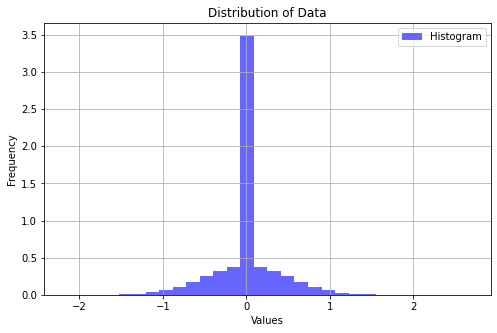

array([-0.        ,  0.72242432,  0.        , ...,  0.        ,
       -0.44194999,  0.        ])

In [15]:
delta6_mu, delta6_sigma = 0, sigma6 / 2

raw_delta6 = np.random.normal(delta6_mu, delta6_sigma, n_samples)

delta6 = raw_delta6 * x7


plot_distribution(delta6)

delta6


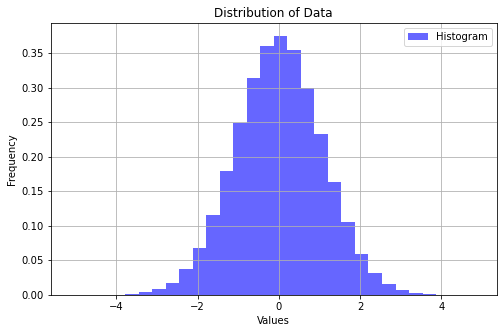

In [16]:
x6_new = x6 + delta6

plot_distribution(x6_new)


In [17]:
x7_new = np.copy(x7)

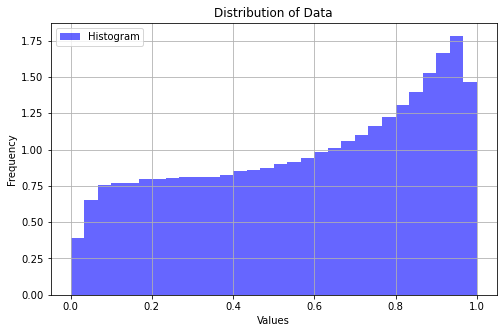

0.5818192127520115

In [18]:
part2_p_y = gen_part2_p_y(x4, x5, x6)
plot_distribution(part2_p_y)
np.mean(part2_p_y)

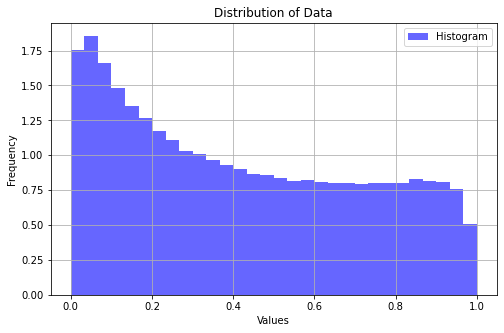

0.42125804590049964

In [19]:
part2_p_y_new = gen_part2_p_y(x4_new, x5_new, x6_new)
plot_distribution(part2_p_y_new)
np.mean(part2_p_y_new)

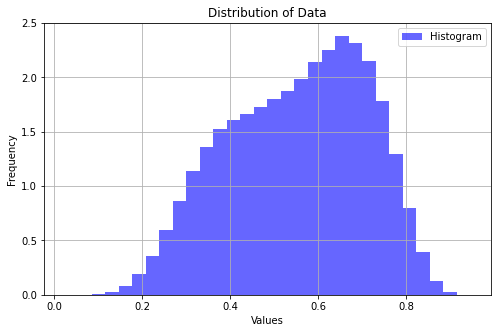

0.5522130905506535

In [20]:
p_y = 0.5 * part1_p_y + 0.5 * part2_p_y
plot_distribution(p_y)
np.mean(p_y)

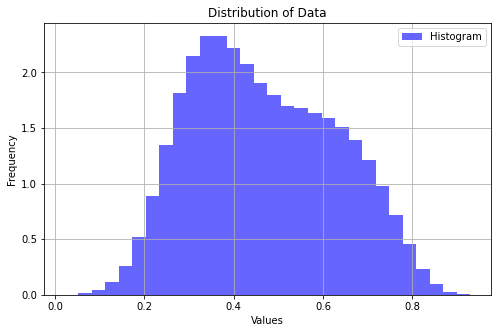

0.468271824245905

In [21]:
p_y_new = 0.5 * part1_p_y_new + 0.5 * part2_p_y_new
plot_distribution(p_y_new)
np.mean(p_y_new)

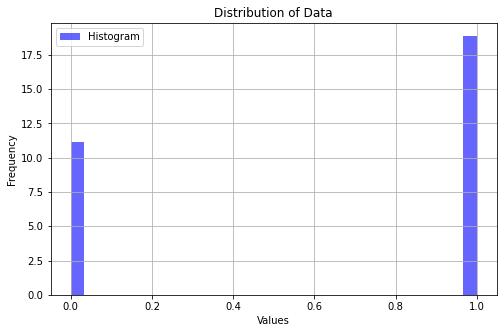

0.62901

In [22]:
y = np.where(p_y > 0.5, 1, 0)
plot_distribution(y)
np.mean(y)

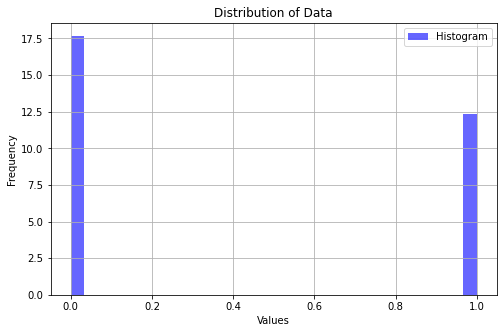

0.410865

In [23]:
y_new = np.where(p_y_new > 0.5, 1, 0)
plot_distribution(y_new)
np.mean(y_new)

In [24]:
all_data = np.zeros((n_samples, 9))


all_data[:, 0] = id_x0
all_data[:, 1] = x1
all_data[:, 2] = x2
all_data[:, 3] = x3
all_data[:, 4] = x4
all_data[:, 5] = x5
all_data[:, 6] = x6
all_data[:, 7] = x7
all_data[:, 8] = y


all_data

array([[ 0.00000000e+00,  6.33607889e+01,  4.57592244e+01, ...,
        -1.21015160e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  7.91169315e+01,  5.26695975e+01, ...,
        -4.50436998e-01,  1.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  5.13739847e+01,  3.68640981e+01, ...,
        -3.53775912e-01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 3.99997000e+05,  7.23510779e+01,  9.91548615e+01, ...,
        -5.20424930e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.99998000e+05,  5.78013026e+01,  5.27532992e+01, ...,
        -1.33053449e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.99999000e+05,  5.33768099e+01,  5.51533696e+01, ...,
         4.26252595e-01,  0.00000000e+00,  1.00000000e+00]])

In [25]:
all_data_new = np.zeros((n_samples, 9))


all_data_new[:, 0] = id_x0_new
all_data_new[:, 1] = x1_new
all_data_new[:, 2] = x2_new
all_data_new[:, 3] = x3_new
all_data_new[:, 4] = x4_new
all_data_new[:, 5] = x5_new
all_data_new[:, 6] = x6_new
all_data_new[:, 7] = x7_new
all_data_new[:, 8] = y_new

all_data_new

array([[ 0.00000000e+00,  6.36225403e+01,  4.51817176e+01, ...,
        -1.21015160e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.82704105e+01,  4.96940172e+01, ...,
         2.71987326e-01,  1.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  6.05029290e+01,  4.55811521e+01, ...,
        -3.53775912e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.99997000e+05,  6.67282376e+01,  9.09466488e+01, ...,
        -5.20424930e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.99998000e+05,  4.47806513e+01,  4.53362646e+01, ...,
        -1.77248448e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.99999000e+05,  4.40311696e+01,  5.65562152e+01, ...,
         4.26252595e-01,  0.00000000e+00,  1.00000000e+00]])

In [26]:
train_data = all_data[:train_num]
train_data

array([[ 0.00000000e+00,  6.33607889e+01,  4.57592244e+01, ...,
        -1.21015160e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  7.91169315e+01,  5.26695975e+01, ...,
        -4.50436998e-01,  1.00000000e+00,  1.00000000e+00],
       [ 2.00000000e+00,  5.13739847e+01,  3.68640981e+01, ...,
        -3.53775912e-01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 9.99700000e+03,  5.31602454e+01,  6.79995169e+01, ...,
        -2.13163029e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.99800000e+03,  2.81493593e+01,  5.60767678e+01, ...,
        -2.69101245e-01,  1.00000000e+00,  1.00000000e+00],
       [ 9.99900000e+03,  6.40891752e+01,  8.20086178e+01, ...,
        -7.03611896e-01,  1.00000000e+00,  1.00000000e+00]])

In [27]:
train_data_new = all_data_new[:train_num]
train_data_new

array([[ 0.00000000e+00,  6.36225403e+01,  4.51817176e+01, ...,
        -1.21015160e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.82704105e+01,  4.96940172e+01, ...,
         2.71987326e-01,  1.00000000e+00,  0.00000000e+00],
       [ 2.00000000e+00,  6.05029290e+01,  4.55811521e+01, ...,
        -3.53775912e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.99700000e+03,  5.69717414e+01,  6.14301912e+01, ...,
        -2.13163029e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.99800000e+03,  2.57921371e+01,  5.92182300e+01, ...,
        -3.66236490e-01,  1.00000000e+00,  0.00000000e+00],
       [ 9.99900000e+03,  4.86731793e+01,  8.47303430e+01, ...,
        -8.71876002e-01,  1.00000000e+00,  0.00000000e+00]])

In [28]:
test_data = all_data[train_num:]
test_data

array([[ 1.00000000e+04,  4.32509481e+01,  2.17461796e+01, ...,
         6.28796613e-01,  0.00000000e+00,  1.00000000e+00],
       [ 1.00010000e+04,  3.49141097e+01,  6.14613551e+01, ...,
        -6.07065296e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.00020000e+04,  3.82314620e+01,  3.30667426e+01, ...,
         2.09788817e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 3.99997000e+05,  7.23510779e+01,  9.91548615e+01, ...,
        -5.20424930e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.99998000e+05,  5.78013026e+01,  5.27532992e+01, ...,
        -1.33053449e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.99999000e+05,  5.33768099e+01,  5.51533696e+01, ...,
         4.26252595e-01,  0.00000000e+00,  1.00000000e+00]])

In [29]:
false_row_indices = np.where(test_data[:, -1] == 0)[0]
len(false_row_indices)

144708

In [30]:
test_data_new = all_data_new[train_num:]
test_data_new

array([[ 1.00000000e+04,  3.82002877e+01,  2.47505594e+01, ...,
         6.28796613e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.00010000e+04,  3.97607542e+01,  6.68282095e+01, ...,
        -6.07065296e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.00020000e+04,  5.29627047e+01,  3.56425660e+01, ...,
         2.09788817e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 3.99997000e+05,  6.67282376e+01,  9.09466488e+01, ...,
        -5.20424930e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.99998000e+05,  4.47806513e+01,  4.53362646e+01, ...,
        -1.77248448e+00,  1.00000000e+00,  0.00000000e+00],
       [ 3.99999000e+05,  4.40311696e+01,  5.65562152e+01, ...,
         4.26252595e-01,  0.00000000e+00,  1.00000000e+00]])

In [31]:
true_row_indices_new = np.where(test_data_new[:, -1] == 1)[0]
len(true_row_indices_new)

160178

In [32]:
index = np.intersect1d(false_row_indices, true_row_indices_new)
index

array([    22,     97,    103, ..., 389681, 389914, 389944])

In [33]:
len(index)

4812

In [34]:
core_test_data = test_data[index]
core_test_data

array([[ 1.00220000e+04,  6.35659470e+01,  6.66678578e+01, ...,
         5.91240560e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.00970000e+04,  7.01417988e+01,  3.21511591e+01, ...,
        -2.21776021e-02,  0.00000000e+00,  0.00000000e+00],
       [ 1.01030000e+04,  6.37894899e+01,  4.83861676e+01, ...,
        -1.85847795e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.99681000e+05,  3.00152809e+01,  6.25038008e+01, ...,
        -9.96510380e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.99914000e+05,  5.79988624e+01,  6.54737547e+01, ...,
         8.89245692e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.99944000e+05,  5.82049884e+01,  6.06945284e+01, ...,
        -7.64321724e-02,  1.00000000e+00,  0.00000000e+00]])

In [35]:
core_test_data_new = test_data_new[index]
core_test_data_new

array([[ 1.00220000e+04,  7.55121895e+01,  7.30371383e+01, ...,
         5.91240560e-01,  0.00000000e+00,  1.00000000e+00],
       [ 1.00970000e+04,  6.85355828e+01,  2.82256487e+01, ...,
        -2.21776021e-02,  0.00000000e+00,  1.00000000e+00],
       [ 1.01030000e+04,  7.13079383e+01,  4.40131587e+01, ...,
        -8.17656229e-01,  1.00000000e+00,  1.00000000e+00],
       ...,
       [ 3.99681000e+05,  2.95640765e+01,  6.14752725e+01, ...,
        -7.65872037e-01,  1.00000000e+00,  1.00000000e+00],
       [ 3.99914000e+05,  4.92881242e+01,  6.18972021e+01, ...,
         1.24604907e+00,  1.00000000e+00,  1.00000000e+00],
       [ 3.99944000e+05,  4.86815912e+01,  5.61914982e+01, ...,
         6.52194358e-01,  1.00000000e+00,  1.00000000e+00]])

In [36]:
np.sum(core_test_data[:, -1])

0.0

In [37]:
np.sum(core_test_data_new[:, -1] - 1.0)

0.0

In [38]:
np.sum(core_test_data[:, 0] != core_test_data_new[:, 0])

0

In [39]:
final_test_index = np.random.choice(core_test_data.shape[0], size=test_num, replace=False)
final_test_data = core_test_data[final_test_index]
final_test_data_new = core_test_data_new[final_test_index]

In [40]:
final_test_data_new

array([[2.89135000e+05, 3.78099993e+01, 4.82184085e+01, ...,
        1.52026388e+00, 1.00000000e+00, 1.00000000e+00],
       [3.75575000e+05, 7.24938690e+01, 2.29621059e+01, ...,
        2.92623091e-01, 1.00000000e+00, 1.00000000e+00],
       [1.95599000e+05, 4.85893573e+01, 7.41757999e+01, ...,
        5.84007510e-02, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.33559000e+05, 5.68613311e+01, 5.04793425e+01, ...,
        5.49463525e-02, 1.00000000e+00, 1.00000000e+00],
       [2.56162000e+05, 4.05679385e+01, 6.28034117e+01, ...,
        2.20678484e-01, 0.00000000e+00, 1.00000000e+00],
       [3.64136000e+05, 5.28678378e+01, 6.13883097e+01, ...,
        9.02067067e-01, 1.00000000e+00, 1.00000000e+00]])

In [41]:
final_test_data

array([[ 2.89135000e+05,  2.32739513e+01,  3.95856337e+01, ...,
         8.20852391e-01,  1.00000000e+00,  0.00000000e+00],
       [ 3.75575000e+05,  6.83270216e+01,  1.39773040e+01, ...,
         1.02790336e-01,  1.00000000e+00,  0.00000000e+00],
       [ 1.95599000e+05,  4.94146122e+01,  6.88754140e+01, ...,
        -4.61850687e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.33559000e+05,  6.18433178e+01,  3.81676372e+01, ...,
        -5.80262349e-01,  1.00000000e+00,  0.00000000e+00],
       [ 2.56162000e+05,  3.25024598e+01,  6.62801399e+01, ...,
         2.20678484e-01,  0.00000000e+00,  0.00000000e+00],
       [ 3.64136000e+05,  4.70996109e+01,  6.25714129e+01, ...,
         2.93787000e-01,  1.00000000e+00,  0.00000000e+00]])

In [42]:
np.sum(final_test_data[:, 0] != final_test_data_new[:, 0])

0

In [43]:
reindex = np.arange(train_num, train_num + test_num)
reindex

array([10000, 10001, 10002, ..., 11997, 11998, 11999])

In [44]:
final_test_data_new_reindex = np.copy(final_test_data_new)
final_test_data_new_reindex[:, 0] = reindex
final_test_data_new_reindex

array([[1.00000000e+04, 3.78099993e+01, 4.82184085e+01, ...,
        1.52026388e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00010000e+04, 7.24938690e+01, 2.29621059e+01, ...,
        2.92623091e-01, 1.00000000e+00, 1.00000000e+00],
       [1.00020000e+04, 4.85893573e+01, 7.41757999e+01, ...,
        5.84007510e-02, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.19970000e+04, 5.68613311e+01, 5.04793425e+01, ...,
        5.49463525e-02, 1.00000000e+00, 1.00000000e+00],
       [1.19980000e+04, 4.05679385e+01, 6.28034117e+01, ...,
        2.20678484e-01, 0.00000000e+00, 1.00000000e+00],
       [1.19990000e+04, 5.28678378e+01, 6.13883097e+01, ...,
        9.02067067e-01, 1.00000000e+00, 1.00000000e+00]])

In [45]:
final_test_data_reindex = np.copy(final_test_data)
final_test_data_reindex[:, 0] = reindex
final_test_data_reindex

array([[ 1.00000000e+04,  2.32739513e+01,  3.95856337e+01, ...,
         8.20852391e-01,  1.00000000e+00,  0.00000000e+00],
       [ 1.00010000e+04,  6.83270216e+01,  1.39773040e+01, ...,
         1.02790336e-01,  1.00000000e+00,  0.00000000e+00],
       [ 1.00020000e+04,  4.94146122e+01,  6.88754140e+01, ...,
        -4.61850687e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.19970000e+04,  6.18433178e+01,  3.81676372e+01, ...,
        -5.80262349e-01,  1.00000000e+00,  0.00000000e+00],
       [ 1.19980000e+04,  3.25024598e+01,  6.62801399e+01, ...,
         2.20678484e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.19990000e+04,  4.70996109e+01,  6.25714129e+01, ...,
         2.93787000e-01,  1.00000000e+00,  0.00000000e+00]])

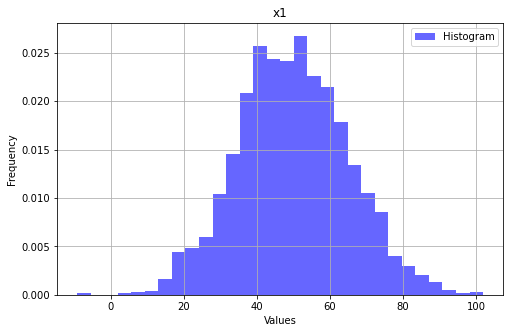

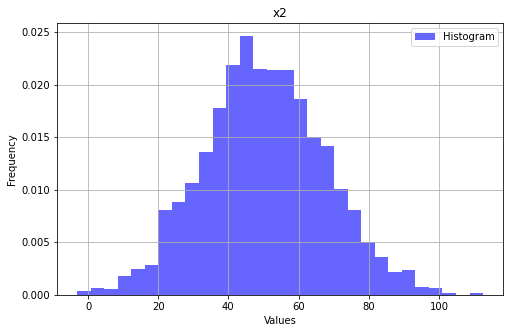

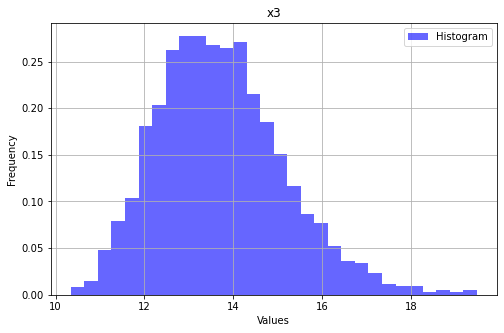

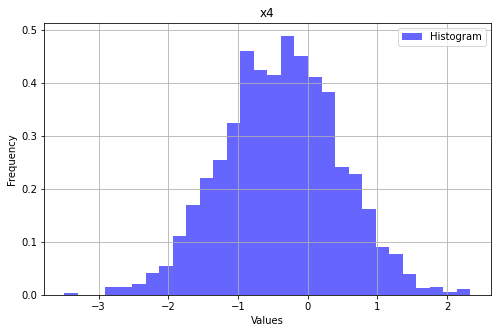

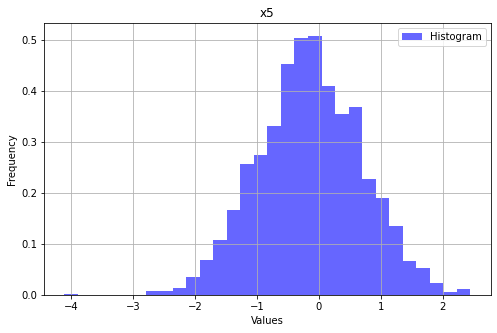

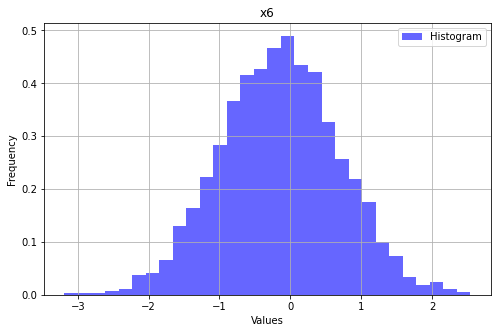

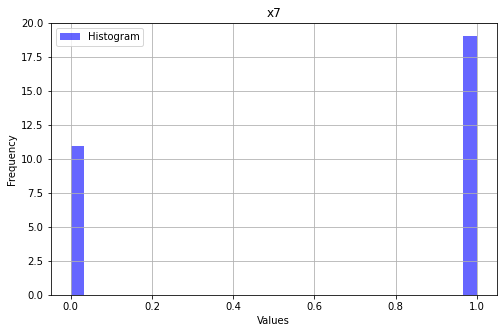

In [46]:
for i in range(1, 8):
    
    x = final_test_data_reindex[:, i].reshape(-1)
    x_new = final_test_data_new_reindex[:, i].reshape(-1)
    
    plot_distribution(x, title="x{}".format(i))


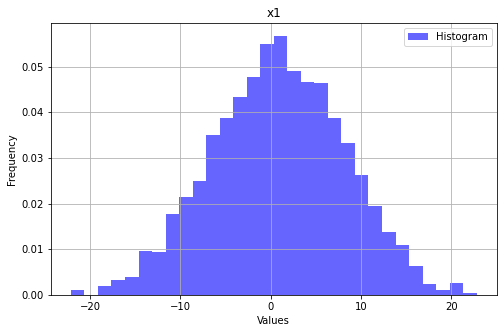

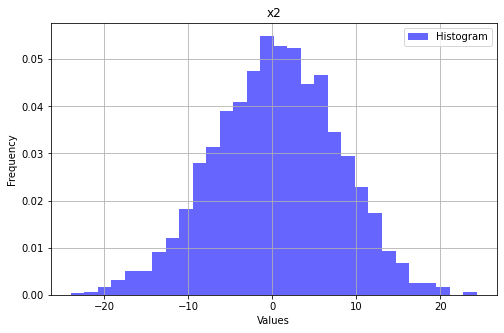

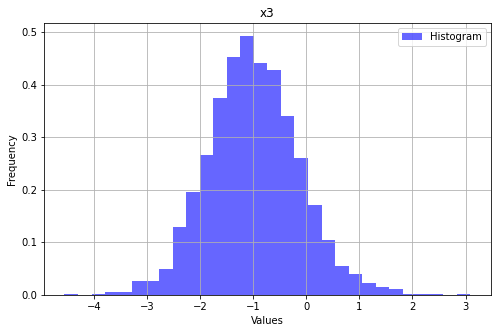

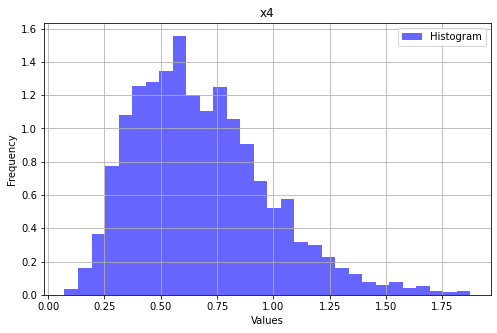

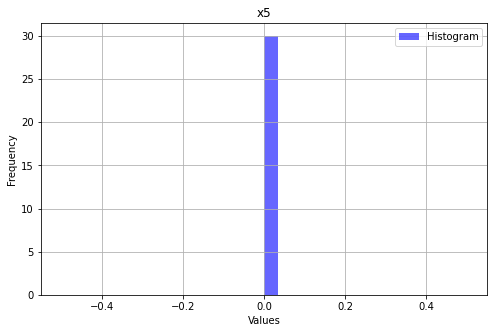

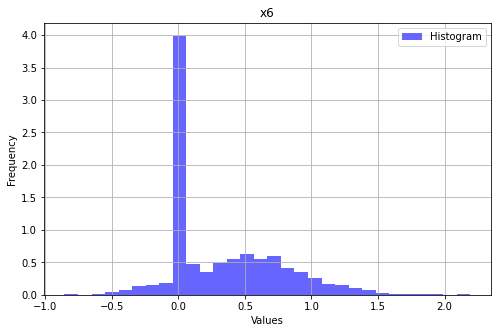

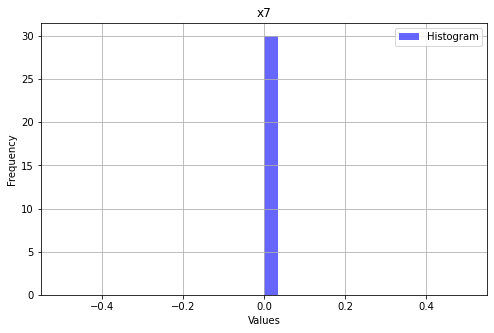

In [47]:
for i in range(1, 8):
    
    x = final_test_data_reindex[:, i].reshape(-1)
    x_new = final_test_data_new_reindex[:, i].reshape(-1)
    
    plot_distribution(x_new - x, title="x{}".format(i))


In [48]:
import pandas as pd

df_column_name_list = ['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y']

train_data_df = pd.DataFrame(data=train_data, columns=df_column_name_list)
train_data_df['id'] = train_data_df['id'].astype(int)
train_data_df['x7'] = train_data_df['x7'].astype(int)

train_data_df

,id,x1,x2,x3,x4,x5,x6,x7,y
0,0,63.360789,45.759224,13.159916,-2.069595,-1.090766,-1.210152,0,1.0
1,1,79.116932,52.669597,14.961216,-1.276017,-0.189885,-0.450437,1,1.0
2,2,51.373985,36.864098,12.092513,0.743636,0.792203,-0.353776,0,1.0
3,3,62.656922,26.930104,12.564673,-0.005148,1.503576,-0.241219,0,1.0
4,4,44.323646,39.236527,12.302052,-0.362842,0.386564,-1.124723,0,0.0
...,...,...,...,...,...,...,...,...,...
9995,9995,68.409495,39.184984,13.260200,-0.959393,0.158166,0.251586,0,1.0
9996,9996,48.098187,32.590837,11.370937,-0.757343,2.685132,-0.535296,0,1.0
9997,9997,53.160245,67.999517,13.710438,-1.027684,0.005136,-2.131630,0,0.0
9998,9998,28.149359,56.076768,11.368443,-0.006355,0.783878,-0.269101,1,1.0


In [49]:
train_data_new_df = pd.DataFrame(data=train_data_new, columns=df_column_name_list)
train_data_new_df['id'] = train_data_new_df['id'].astype(int)
train_data_new_df['x7'] = train_data_new_df['x7'].astype(int)

train_data_new_df

,id,x1,x2,x3,x4,x5,x6,x7,y
0,0,63.622540,45.181718,13.574389,-1.260719,-1.090766,-1.210152,0,0.0
1,1,88.270410,49.694017,16.498228,0.172817,-0.189885,0.271987,1,0.0
2,2,60.502929,45.581152,14.540185,1.279544,0.792203,-0.353776,0,0.0
3,3,66.362503,22.347963,11.921310,1.310091,1.503576,-0.241219,0,0.0
4,4,47.652793,41.910513,12.072816,0.360117,0.386564,-1.124723,0,0.0
...,...,...,...,...,...,...,...,...,...
9995,9995,63.369119,41.482953,13.189151,0.191901,0.158166,0.251586,0,1.0
9996,9996,45.145908,33.390420,11.857936,0.130301,2.685132,-0.535296,0,1.0
9997,9997,56.971741,61.430191,14.369715,-0.102821,0.005136,-2.131630,0,0.0
9998,9998,25.792137,59.218230,12.144089,0.792940,0.783878,-0.366236,1,0.0


In [50]:
test_data_df = pd.DataFrame(data=final_test_data_reindex, columns=df_column_name_list)
test_data_df['id'] = test_data_df['id'].astype(int)
test_data_df['x7'] = test_data_df['x7'].astype(int)

test_data_df

,id,x1,x2,x3,x4,x5,x6,x7,y
0,10000,23.273951,39.585634,11.641108,0.858397,0.255481,0.820852,1,0.0
1,10001,68.327022,13.977304,12.670759,-0.360402,0.919841,0.102790,1,0.0
2,10002,49.414612,68.875414,14.008800,-0.149808,-0.224836,-0.461851,1,0.0
3,10003,70.027209,72.294902,16.997845,0.230585,0.669857,-0.108737,0,0.0
4,10004,85.294771,33.848765,15.029097,0.157015,-0.250432,1.289808,0,0.0
...,...,...,...,...,...,...,...,...,...
1995,11995,46.829922,43.948863,13.438397,0.797873,0.436130,0.898899,1,0.0
1996,11996,42.028397,34.847544,12.892535,-0.472730,0.354086,-0.004849,1,0.0
1997,11997,61.843318,38.167637,13.236204,-0.250693,0.423148,-0.580262,1,0.0
1998,11998,32.502460,66.280140,14.127770,-0.847998,0.177015,0.220678,0,0.0


In [51]:
test_data_new_df = pd.DataFrame(data=final_test_data_new_reindex, columns=df_column_name_list)
test_data_new_df['id'] = test_data_new_df['id'].astype(int)
test_data_new_df['x7'] = test_data_new_df['x7'].astype(int)

test_data_new_df

,id,x1,x2,x3,x4,x5,x6,x7,y
0,10000,37.809999,48.218409,12.496043,1.442018,0.255481,1.520264,1,1.0
1,10001,72.493869,22.962106,12.632457,0.533321,0.919841,0.292623,1,1.0
2,10002,48.589357,74.175800,13.814762,0.524516,-0.224836,0.058401,1,1.0
3,10003,70.393428,80.499912,16.416013,0.853889,0.669857,-0.108737,0,1.0
4,10004,83.493980,31.928322,13.529902,0.770963,-0.250432,1.289808,0,1.0
...,...,...,...,...,...,...,...,...,...
1995,11995,62.575137,44.392659,13.282689,1.860558,0.436130,1.173280,1,1.0
1996,11996,34.391604,46.120661,11.692622,0.075932,0.354086,0.451190,1,1.0
1997,11997,56.861331,50.479343,12.973841,0.696881,0.423148,0.054946,1,1.0
1998,11998,40.567938,62.803412,13.318014,0.138949,0.177015,0.220678,0,1.0


In [52]:
train_data_df.to_csv(save_path + 'train_data.csv', index=False)
train_data_new_df.to_csv(save_path + 'train_data_new.csv', index=False)
test_data_df.to_csv(save_path + 'test_data.csv', index=False)
test_data_new_df.to_csv(save_path + 'test_data_new.csv', index=False)